Sources:

* International players: [Transfermakt](https://www.transfermarkt.com/premier-league/nationalspieler/wettbewerb/GB1)

* Players performance: [Fantasy Premier League](https://fantasy.premierleague.com/)


In [1]:
from fpl import fpl
api = fpl()

Filtering players without points

Diferencia antes: 0.6894845665337471
Diferencia despues: 0.6518679339415729
DID: -0.03761663259217418


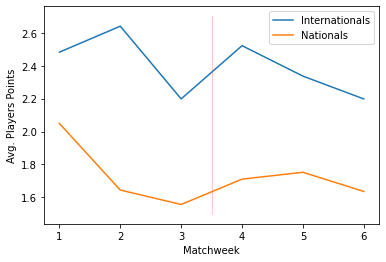

In [2]:
api.DID()

In [3]:
0.03761663259217418 / 0.6894845665337471

0.05455761364070071

Diferencia antes: 1.1597101112273764
Diferencia despues: 0.7586596300079446
DID: -0.4010504812194319


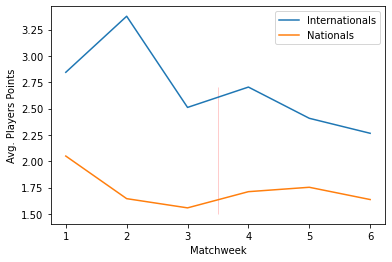

In [4]:
api.DID(True)

In [5]:
-0.4010504812194319 / 1.1597101112273764

-0.3458195952046853

C:\Users\eloyc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ttest_indResult(statistic=0.06928579165903526, pvalue=0.9448166497236522)


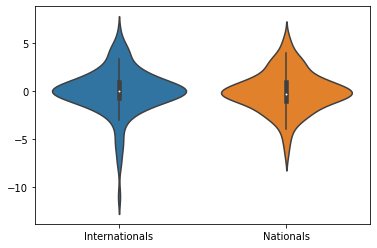

In [2]:
api.matching()

In [4]:
data = api._propensity_score()

internationals = data.loc[data.international].set_index("player_id")
nationals = data.loc[~data.international].set_index("player_id")

matchs = {"int_points_diff" : [], "nat_points_diff": [], "ps_diff" : []}
for player_id, player in internationals.iterrows():
    nationals["ps_comparison"] = (nationals.propensity_score - player.propensity_score).abs()
    ps_diff = nationals.ps_comparison.min()
    if ps_diff > 0.005:
        continue
    nat_player_id = nationals.ps_comparison.idxmin()

    aux = api._players_history[str(player_id)]["history"].loc[api._players_history[str(player_id)]["history"].kickoff_time < "2021-09-30T00:00:00Z"]
    prev_int_points = aux.loc[aux.kickoff_time < "2021-09-02T00:00:00Z"].total_points.mean()
    post_int_points = aux.loc[aux.kickoff_time > "2021-09-02T00:00:00Z"].total_points.mean()
    aux = api._players_history[str(nat_player_id)]["history"].loc[api._players_history[str(nat_player_id)]["history"].kickoff_time < "2021-09-30T00:00:00Z"]
    prev_nat_points = aux.loc[aux.kickoff_time < "2021-09-02T00:00:00Z"].total_points.mean()
    post_nat_points = aux.loc[aux.kickoff_time > "2021-09-02T00:00:00Z"].total_points.mean()

    if prev_int_points != prev_int_points or post_int_points != post_int_points or prev_nat_points != prev_nat_points or post_nat_points != post_nat_points:
        continue

    matchs["int_points_diff"].append(post_int_points - prev_int_points)
    matchs["nat_points_diff"].append(post_nat_points - prev_nat_points)
    matchs["ps_diff"].append(ps_diff)

    nationals.drop(nat_player_id, inplace = True)

N = len(matchs["nat_points_diff"])
sns.violinplot(y = matchs["int_points_diff"] + matchs["nat_points_diff"], x = (["Internationals"] * N) + (["Nationals"] * N))

print(stats.ttest_ind(matchs["int_points_diff"], matchs["nat_points_diff"]))

C:\Users\eloyc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'sns' is not defined

[Text(0.5, 1.0, 'Distribution of total points difference')]

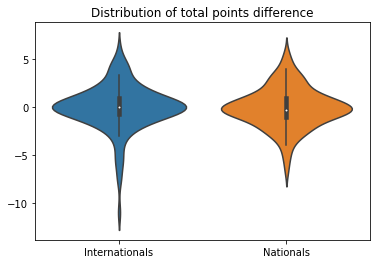

In [6]:
import seaborn as sns
g = sns.violinplot(y = matchs["int_points_diff"] + matchs["nat_points_diff"], x = (["Internationals"] * N) + (["Nationals"] * N))
g.set(title = "Distribution of total points difference")